## Preprocessing

In [16]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import regularizers

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [17]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [18]:
# Drop additional columns for optimization
application_df = application_df.drop(columns = ['SPECIAL_CONSIDERATIONS', 'STATUS'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [19]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [20]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [21]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [22]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [24]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [25]:
# Look at ASK_AMT value counts to identify and replace with category
ask_amount = application_df['ASK_AMT'].value_counts()
list(application_df['ASK_AMT'])

[5000,
 108590,
 5000,
 6692,
 142590,
 5000,
 31452,
 7508025,
 94389,
 5000,
 69656,
 165593,
 5000,
 5301,
 5000,
 5000,
 5000,
 86380556,
 5000,
 376109,
 5000,
 5000,
 318296,
 5000,
 5000,
 5000,
 5000,
 44004,
 5000,
 5000,
 323466,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 709815,
 1329410,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 31613,
 1549352,
 5000,
 577113,
 44623,
 64868,
 131620,
 5000,
 306133,
 66916,
 5000,
 236206,
 5000,
 393704,
 5000,
 5000,
 9955466,
 94869,
 5000,
 6501,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 36607,
 5000,
 5000,
 5000,
 484855,
 5000,
 137272,
 5000,
 5000,
 101980,
 4410503,
 5000,
 5000,
 5000,
 15477,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 24211,
 9868,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 5000,
 

In [26]:
# Establish categories with bins and labels
bins = [0, 10000, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme']

application_df['ASK_AMT'] = pd.cut(application_df['ASK_AMT'], bins=bins, labels=labels, right=False)

In [27]:
# Review dataframe to ensure the column change occurred correctly
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,0,Very Low,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,High,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,Very Low,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,Very Low,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,High,1


In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_app_df = pd.get_dummies(application_df)
numeric_app_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,ASK_AMT_Very Low,ASK_AMT_Low,ASK_AMT_Medium,ASK_AMT_High,ASK_AMT_Very High,ASK_AMT_Extreme
0,1,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
34295,0,False,False,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
34296,0,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
34297,1,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [29]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 24
hidden_nodes_layer3 = 12


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
nn.add(tf.keras.layers.Dropout(0.3))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu",  kernel_regularizer=regularizers.l2(0.01)))
nn.add(tf.keras.layers.Dropout(0.3))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                516       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainabl

In [32]:
nn.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [52]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=150)

Epoch 1/150
804/804 [==============================] - 1s 1ms/step - loss: 0.7592 - accuracy: 0.6581
Epoch 2/150
804/804 [==============================] - 1s 1ms/step - loss: 0.6125 - accuracy: 0.7166
Epoch 3/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5950 - accuracy: 0.7172
Epoch 4/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5927 - accuracy: 0.7175
Epoch 5/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5877 - accuracy: 0.7194
Epoch 6/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5864 - accuracy: 0.7193
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5869 - accuracy: 0.7185
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5847 - accuracy: 0.7179
Epoch 9/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5855 - accuracy: 0.7194
Epoch 10/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5832 - accura

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5656 - accuracy: 0.7311 - 288ms/epoch - 1ms/step
Loss: 0.5656228065490723, Accuracy: 0.7310787439346313


<Axes: >

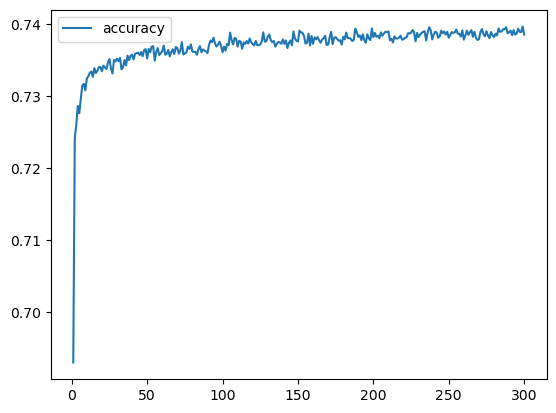

In [21]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [27]:
# Export our model to HDF5 file
# nn.save('Models/AlphabetSoupCharity_Optimization.h5')